In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import datetime as dt

In [5]:
import seaborn as sns

In [6]:
sales_data=pd.read_csv("C:/Users/Rohit/Downloads/Python/Case Study/6 Python Visulatization Case Study/SalesData.csv")
sales_data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [8]:
sales_data['Units2015']=sales_data['Units2015'].astype('int64')
sales_data['Units2016']=sales_data['Units2016'].astype('int64')

#### Q1 Compare Sales by region for 2016 with 2015 using bar chart

In [9]:
sales_regionwise=sales_data.groupby('Region')[['Sales2015','Sales2016']].agg({'Sales2015' : sum, 'Sales2016' : sum}).round(2).reset_index()
sales_regionwise

,Region,Sales2015,Sales2016
0,Central,7891728.86,9787808.73
1,East,9512916.49,12667230.45
2,West,5349744.64,7209689.43


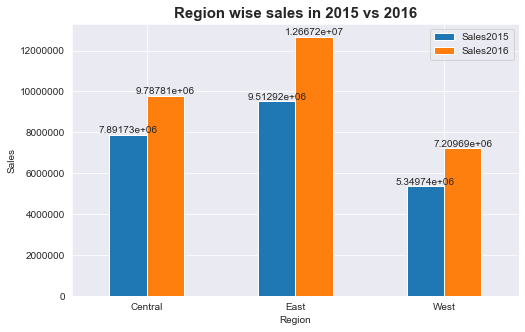

In [10]:
sns.set_style('darkgrid')
am=sales_regionwise.plot(kind='bar', x='Region', figsize=(8, 5))
plt.title('Region wise sales in 2015 vs 2016', fontweight='bold', fontsize=15)
for c in am.containers:
    am.bar_label(c, label_type='edge')
plt.ylabel('Sales')
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(rotation=0)
plt.show()  

#### Q2  What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [11]:
sales_regionwise_2016=sales_data.groupby('Region')['Sales2016'].sum().round(2)
sales_regionwise_2016

Region
Central     9787808.73
East       12667230.45
West        7209689.43
Name: Sales2016, dtype: float64

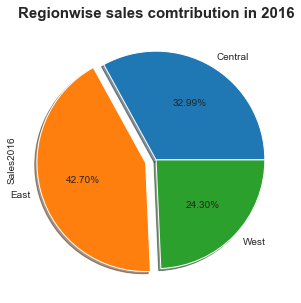

In [12]:
plt.figure(figsize=(5,5))
sales_regionwise_2016.plot(kind='pie', autopct='%.2f%%', shadow=True, explode=[0, 0.1, 0], fontsize=10)
plt.title('Regionwise sales comtribution in 2016', fontweight='bold', fontsize=15)
plt.show()

#### Q3 Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [13]:
sales_reg_tier_wise=sales_data.groupby(['Region', 'Tier'])[['Sales2015','Sales2016']].agg({'Sales2015' : sum, 'Sales2016' : sum}).round(2)
sales_reg_tier_wise

Sales2015   Sales2016
Region  Tier                        
Central High  4798698.43  6026042.94
        Low    943439.67  1132832.85
        Med   2068225.87  2632181.47
        Out     81364.89    -3248.53
East    High  6102946.12  7817151.10
        Low    901665.80  1144929.59
        Med   2470998.02  3705149.76
        Out     37306.55        0.00
West    High  2944789.26  3768038.35
        Low    671064.38  1099502.18
        Med   1718475.92  2342148.90
        Out     15415.08        0.00

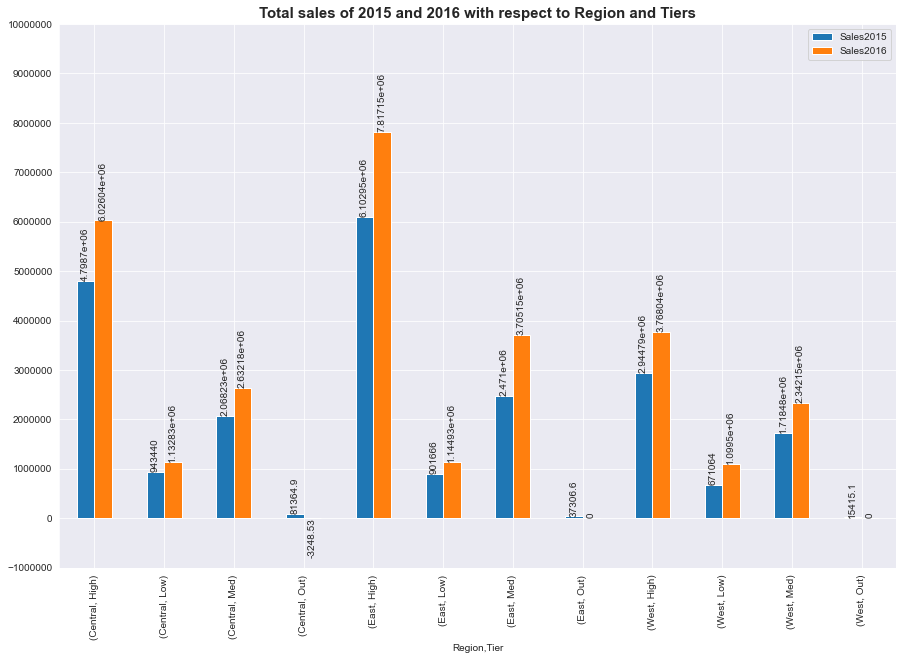

In [14]:
sns.set_style('darkgrid')
reg_tier_plot=sales_reg_tier_wise.plot(kind='bar', figsize=(15, 10), width=0.5)
plt.title('Total sales of 2015 and 2016 with respect to Region and Tiers', fontweight='bold', fontsize=15)
for c in reg_tier_plot.containers:
    reg_tier_plot.bar_label(c, label_type='edge', rotation=90, fontsize=10)
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(rotation=90)
plt.yticks(np.arange(-1000000, 11000000, 1000000))
plt.show()  

#### Q4  In East region, which state registered a decline in 2016 as compared to 2015?

In [15]:
sales_state_wise=sales_data.groupby(['Region','State'])[['Sales2015','Sales2016']].agg({'Sales2015' : sum, 'Sales2016' : sum}).round(2)
sales_state_wise

Sales2015   Sales2016
Region  State                        
Central AL      509103.73   595828.38
        AR      213317.47   227608.12
        IL      621793.78   784307.35
        IN      316678.06   599672.32
        KY      531214.94   633218.86
        LA      479366.20   680303.29
        MI      568651.71   707248.04
        MS      304578.19   220410.87
        OH      927687.51  1221084.74
        OK      248460.73   339644.48
        PA      300266.98   287792.41
        TN      437038.62   552230.13
        TX     1712439.72  2013115.52
        WI      304424.98   440380.24
        WV      416706.24   484963.98
East    CT      197202.79   323502.31
        DC      216723.95   257421.69
        FL     1660162.00  2508232.28
        GA      681546.46   946919.77
        MA      419278.75   687096.45
        MD      527309.06   750008.79
        ME       77425.64   183673.05
        NC     1292801.64  1610521.00
        NH      136419.38   144717.51
        NJ      520419.29   782289.19
        NY     1725415.06  1703135.80
        PA      785092.76   894319.49
        RI      156311.80   162454.65
        SC      247811.78   463414.12
        TN       49677.00    70109.41
        VA      819319.13  1179414.94
West    AZ      388987.60   519507.86
        CA     1891620.85  2396883.17
        CO      402338.54   504653.65
        IA      102271.41   146160.35
        ID       92373.88   115768.43
        IL       93753.50   122479.55
        KS      228457.68   285020.75
        MN      314229.73   322052.33
        MO      444461.80   724166.33
        NE       69816.22    85872.84
        NM       88280.41   132512.18
        NV      205793.98   281423.36
        OR      262923.66   438357.84
        SD       75490.41   166256.53
        TX      253073.35   349579.06
        UT      113362.21   173209.74
        WA      322509.41   445785.46

In [16]:
sales_east_state=sales_state_wise.loc['East']
sales_east_state

,Sales2015,Sales2016
State,,
CT,197202.79,323502.31
DC,216723.95,257421.69
FL,1660162.00,2508232.28
GA,681546.46,946919.77
MA,419278.75,687096.45
MD,527309.06,750008.79
ME,77425.64,183673.05
NC,1292801.64,1610521.00
NH,136419.38,144717.51


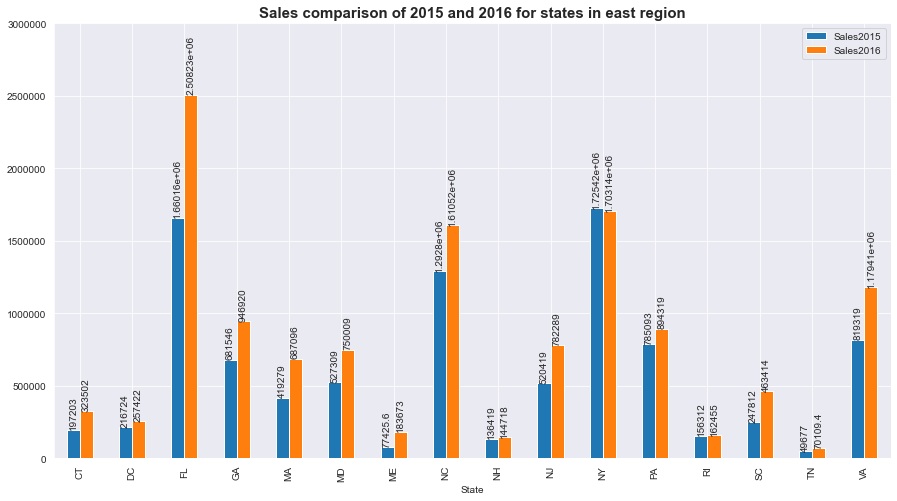

In [17]:
sns.set_style('darkgrid')
east_state_plot=sales_east_state.plot(kind='bar', figsize=(15, 8), width=0.5)
plt.title('Sales comparison of 2015 and 2016 for states in east region', fontweight='bold', fontsize=15)
for c in east_state_plot.containers:
    east_state_plot.bar_label(c, label_type='edge', rotation=90, fontsize=10)
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 3500000, 500000))
plt.show()  

In [18]:
print('In east region NY state has registered sales decline in 2016 compared to 2015')

In east region NY state has registered sales decline in 2016 compared to 2015


#### Q5  In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [19]:
sales_tier_div_wise=sales_data.groupby(['Tier','Division'])[['Sales2015','Sales2016']].agg({'Sales2015' : sum, 'Sales2016' : sum}).round(2)
sales_tier_div_wise

Sales2015   Sales2016
Tier Division                            
High BIG APPLE      563638.61   669485.03
     CHARGERS       357746.20   485728.16
     CONGRESSIONAL  481600.89   591768.57
     DIAMONDBACK    422571.32   487963.45
     EMPIRE         908479.99  1027031.07
...                       ...         ...
Out  SYNERGY         11522.02        0.00
     THE CAROLINAS    5213.90        0.00
     VICTORY          2707.11        0.00
     WOLVERINE        3316.03        0.00
     WRANGLER        28998.43        0.00

[96 rows x 2 columns]

In [20]:
sales_high_div=sales_tier_div_wise.loc['High']
sales_high_div

,Sales2015,Sales2016
Division,,
BIG APPLE,563638.61,669485.03
CHARGERS,357746.20,485728.16
CONGRESSIONAL,481600.89,591768.57
DIAMONDBACK,422571.32,487963.45
EMPIRE,908479.99,1027031.07
GRIDIRON,499841.12,623601.66
GULF STREAM,507790.52,807835.66
HAILSTORM,515226.63,691777.98
KINETIC,614482.72,667336.37


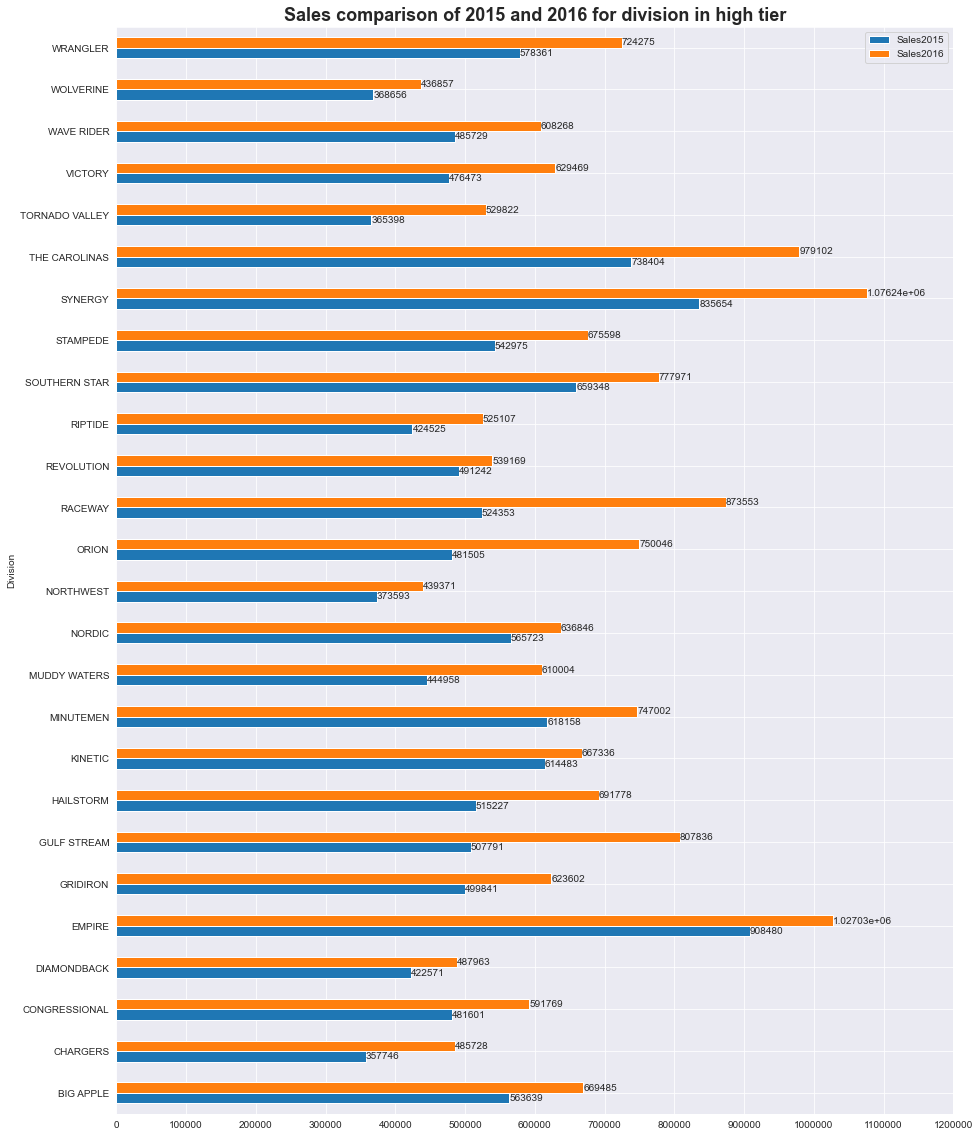

In [21]:
sns.set_style('darkgrid')
high_div_plot=sales_high_div.plot(kind='barh', figsize=(15, 20), width=0.5)
plt.title('Sales comparison of 2015 and 2016 for division in high tier', fontweight='bold', fontsize=18)
for c in high_div_plot.containers:
    high_div_plot.bar_label(c, label_type='edge', fontsize=10)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(np.arange(0, 1300000, 100000))
plt.show()  

In [22]:
print('No division in High tier has registered sales decline in 2016 compared to 2015')

No division in High tier has registered sales decline in 2016 compared to 2015


#### Q6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1

• Apr - Jun : Q2

• Jul - Sep : Q3

• Oct - Dec : Q4 

In [23]:
quarter=[]
for i in sales_data['Month']:
    if i in ['Jan', 'Feb', 'Mar']:
        quarter.append('Q1')
    elif i in ['Apr', 'May', 'Jun']:
        quarter.append('Q2')
    elif i in ['Jul', 'Aug', 'Sep']:
        quarter.append('Q3')
    else:
        quarter.append('Q4')
quarter

['Q3',
 'Q4',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q2',
 'Q4',
 'Q4',
 'Q1',
 'Q2',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q4',
 'Q4',
 'Q4',
 'Q1',
 'Q1',
 'Q2',
 'Q2',
 'Q2',
 'Q1',
 'Q4',
 'Q3',
 'Q4',
 'Q1',
 'Q1',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q2',
 'Q3',
 'Q3',
 'Q4',
 'Q3',
 'Q1',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q2',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q2',
 'Q4',
 'Q3',
 'Q4',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q1',
 'Q4',
 'Q1',
 'Q2',
 'Q1',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q2',
 'Q1',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q1',
 'Q2',

In [24]:
sales_data.insert(8, 'Qtr', quarter)
sales_data.head(5)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Qtr,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,Q3,0.00,13208.52,0,4,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,Q4,10500.78,23114.91,3,7,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,Q2,0.00,6627.00,0,3,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,Q1,19881.00,13254.00,9,6,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,Q3,3684.48,0.00,1,0,1.02,1.53


#### Q7 Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [25]:
sales_qtr_wise=sales_data.groupby('Qtr')[['Sales2015','Sales2016']].agg({'Sales2015' : sum, 'Sales2016' : sum}).round(2)
sales_qtr_wise

,Sales2015,Sales2016
Qtr,,
Q1,5485800.16,6997953.24
Q2,5390862.08,7237361.17
Q3,6164093.84,7861546.02
Q4,5713633.91,7567868.17


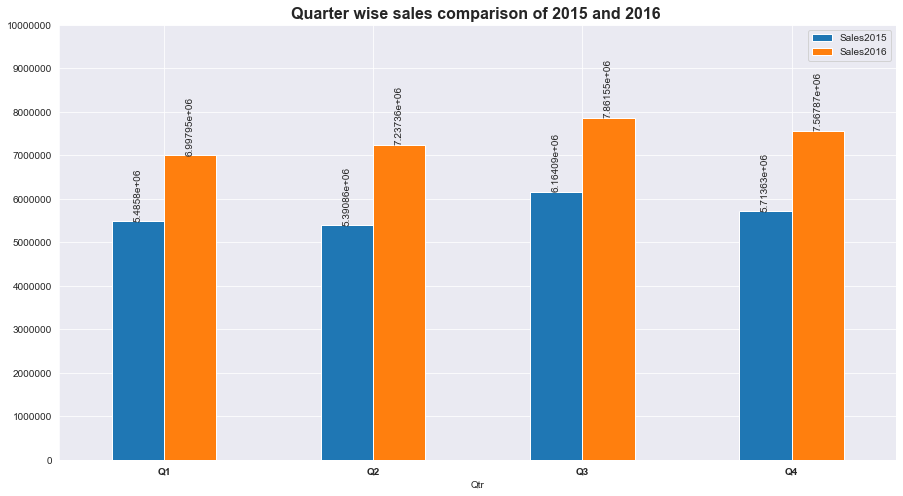

In [26]:
sns.set_style('darkgrid')
qtr_wise_plot=sales_qtr_wise.plot(kind='bar', figsize=(15, 8), width=0.5)
plt.title('Quarter wise sales comparison of 2015 and 2016 ', fontweight='bold', fontsize=16)
for c in qtr_wise_plot.containers:
    qtr_wise_plot.bar_label(c, label_type='edge', rotation=90, fontsize=10)
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(np.arange(0, 11000000, 1000000))
plt.show() 

#### Q8 Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [34]:
Qtr1_sales_comp=sales_data.loc[sales_data['Qtr']=='Q1', :].groupby('Tier')['Sales2016'].sum().round(2)
Qtr1_sales_comp

Tier
High    3867718.60
Low      948832.77
Med     2181401.88
Out           0.00
Name: Sales2016, dtype: float64

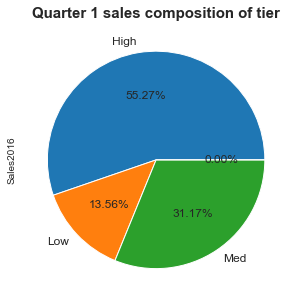

In [39]:
plt.figure(figsize=(5,5))
Qtr1_sales_comp.plot(kind='pie', autopct='%.2f%%', fontsize=12)
plt.title('Quarter 1 sales composition of tier', fontweight='bold', fontsize=15)
plt.show()

In [40]:
Qtr2_sales_comp=sales_data.loc[sales_data['Qtr']=='Q2', :].groupby('Tier')['Sales2016'].sum().round(2)
Qtr2_sales_comp

Tier
High    4130952.56
Low      890594.75
Med     2215813.86
Out           0.00
Name: Sales2016, dtype: float64

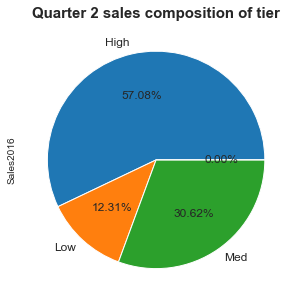

In [41]:
plt.figure(figsize=(5,5))
Qtr2_sales_comp.plot(kind='pie', autopct='%.2f%%', fontsize=12)
plt.title('Quarter 2 sales composition of tier', fontweight='bold', fontsize=15)
plt.show()

In [42]:
Qtr3_sales_comp=sales_data.loc[sales_data['Qtr']=='Q3', :].groupby('Tier')['Sales2016'].sum().round(2)
Qtr3_sales_comp

Tier
High    4872559.25
Low      795177.71
Med     2197057.59
Out       -3248.53
Name: Sales2016, dtype: float64

ValueError: pie plot doesn't allow negative values

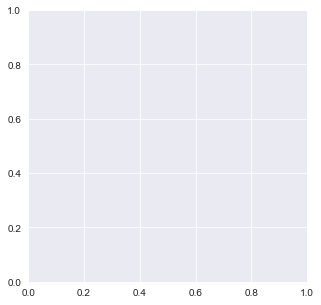

In [44]:
plt.figure(figsize=(5,5))
Qtr3_sales_comp.plot(kind='pie', autopct='%.2f%%', fontsize=12, )
plt.title('Quarter 3 sales composition of tier', fontweight='bold', fontsize=15)
plt.show()

In [45]:
Qtr4_sales_comp=sales_data.loc[sales_data['Qtr']=='Q4', :].groupby('Tier')['Sales2016'].sum().round(2)
Qtr4_sales_comp

Tier
High    4740001.99
Low      742659.39
Med     2085206.80
Out           0.00
Name: Sales2016, dtype: float64

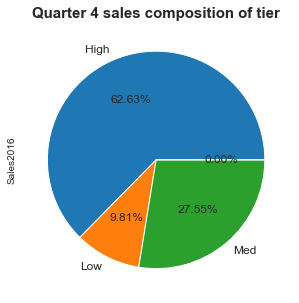

In [46]:
plt.figure(figsize=(5,5))
Qtr4_sales_comp.plot(kind='pie', autopct='%.2f%%', fontsize=12)
plt.title('Quarter 4 sales composition of tier', fontweight='bold', fontsize=15)
plt.show()